In [100]:
# Import the modules
import pandas as pd
from pathlib import Path
import hvplot.pandas
from sklearn.cluster import KMeans

In [101]:
# Read in the CSV file as a Pandas DataFrame
candle_df = pd.read_csv(
    Path("../Resources/eth.csv")
)

# Review the DataFrame
display(candle_df.head())
display(candle_df.tail())

,time,open,high,low,close,volume
0,2019-09-23 23:59:59.999,209.55,209.55,209.55,209.55,0.01000
1,2019-09-24 23:59:59.999,195.50,195.50,152.56,167.09,2224.36708
2,2019-09-25 23:59:59.999,166.84,174.15,163.18,170.00,181.60286
3,2019-09-26 23:59:59.999,169.95,170.77,153.07,166.69,545.45350
4,2019-09-27 23:59:59.999,166.34,175.54,161.44,173.69,630.91688


,time,open,high,low,close,volume
1161,2022-11-27 23:59:59.999,1205.19,1223.05,1189.13,1193.83,654.26480
1162,2022-11-28 23:59:59.999,1194.92,1198.52,1151.39,1168.13,1260.68583
1163,2022-11-29 23:59:59.999,1167.25,1225.00,1158.51,1216.37,1504.19549
1164,2022-11-30 23:59:59.999,1217.53,1309.49,1212.77,1293.60,2191.94037
1165,2022-12-01 23:59:59.999,1296.18,1298.45,1263.08,1276.50,623.48889


In [102]:
signals_df = candle_df.loc[:,['close','volume']]

signals_df['actual_returns'] = signals_df['close'].pct_change()

signals_df = signals_df


display(signals_df.head())
display(signals_df.tail())

,close,volume,actual_returns
0,209.55,0.01000,NaN
1,167.09,2224.36708,-0.202625
2,170.00,181.60286,0.017416
3,166.69,545.45350,-0.019471
4,173.69,630.91688,0.041994


,close,volume,actual_returns
1161,1193.83,654.26480,-0.009204
1162,1168.13,1260.68583,-0.021527
1163,1216.37,1504.19549,0.041297
1164,1293.60,2191.94037,0.063492
1165,1276.50,623.48889,-0.013219


In [103]:
signals_df.index = (candle_df['time'])

signals_df



,close,volume,actual_returns
time,,,
2019-09-23 23:59:59.999,209.55,0.01000,NaN
2019-09-24 23:59:59.999,167.09,2224.36708,-0.202625
2019-09-25 23:59:59.999,170.00,181.60286,0.017416
2019-09-26 23:59:59.999,166.69,545.45350,-0.019471
2019-09-27 23:59:59.999,173.69,630.91688,0.041994
...,...,...,...
2022-11-27 23:59:59.999,1193.83,654.26480,-0.009204
2022-11-28 23:59:59.999,1168.13,1260.68583,-0.021527
2022-11-29 23:59:59.999,1216.37,1504.19549,0.041297


In [104]:
signals_df = signals_df.dropna()

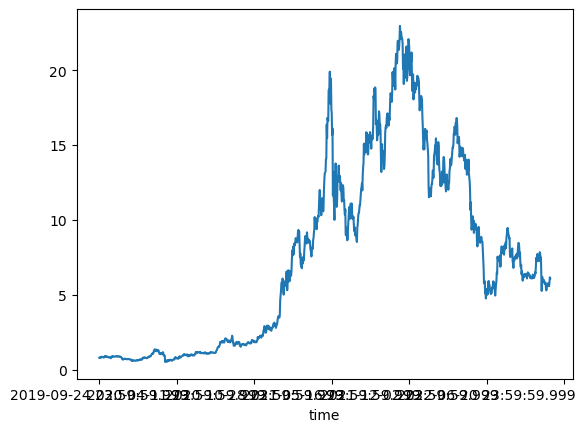

In [105]:
actual_returns = (1 + signals_df['actual_returns']).cumprod().plot()

In [106]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

In [107]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(signals_df)
    inertia.append(k_model.inertia_)

In [108]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,3.225763e+10
1,2,1.145190e+10
2,3,6.311233e+09
3,4,4.420940e+09
4,5,3.191162e+09


In [109]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [110]:
# Define the model with 4 clusters
model = KMeans(n_clusters=3, random_state=1)

# Fit the model
model.fit(signals_df)

# Make predictions
k_3 = model.predict(signals_df)

# Create a copy of the DataFrame
signals_df_predictions = signals_df.copy()

# Add a class column with the labels
signals_df_predictions['cluster_segment'] = k_3

In [111]:
# Plot the clusters
signals_df_predictions.hvplot.scatter(
    x="close",
    y="volume",
    by="cluster_segment"
)

:NdOverlay   [cluster_segment]
   :Scatter   [close]   (volume)

In [112]:
signals_df.describe()

,close,volume,actual_returns
count,1165.000000,1165.000000,1165.000000
mean,1571.279545,4556.943578,0.002892
std,1304.340115,5100.141170,0.051042
min,108.650000,79.553530,-0.441359
25%,259.150000,1300.655520,-0.021185
50%,1356.250000,2702.626210,0.002174
75%,2606.520000,5736.375100,0.028991
max,4809.610000,34393.012140,0.263013


In [113]:
buy_signals = signals_df.loc[signals_df['actual_returns'] <= -0.021]
buy_signals

,close,volume,actual_returns
time,,,
2019-09-24 23:59:59.999,167.09,2224.36708,-0.202625
2019-10-01 23:59:59.999,175.66,1145.93635,-0.027569
2019-10-03 23:59:59.999,174.61,663.66412,-0.032310
2019-10-06 23:59:59.999,170.19,432.94126,-0.033231
2019-10-11 23:59:59.999,180.58,2733.21683,-0.055149
...,...,...,...
2022-11-13 23:59:59.999,1224.03,2349.77575,-0.025772
2022-11-16 23:59:59.999,1216.36,3684.59502,-0.029900
2022-11-20 23:59:59.999,1142.04,2637.61175,-0.062318


In [114]:
sell_signals = signals_df.loc[signals_df['actual_returns'] >= 0.028]
sell_signals

,close,volume,actual_returns
time,,,
2019-09-27 23:59:59.999,173.69,630.91688,0.041994
2019-09-30 23:59:59.999,180.64,1462.69491,0.065974
2019-10-07 23:59:59.999,179.94,663.15443,0.057289
2019-10-09 23:59:59.999,192.81,1125.24298,0.066958
2019-10-14 23:59:59.999,186.73,2057.30732,0.031373
...,...,...,...
2022-11-04 23:59:59.999,1644.76,5723.87947,0.075766
2022-11-10 23:59:59.999,1299.42,5809.30484,0.179243
2022-11-23 23:59:59.999,1184.20,3725.31876,0.038845


In [115]:
# Initialize the new Signal column
signals_df['Signal'] = 0.0

#generate signal to buy stock
signals_df.loc[(signals_df['actual_returns'] <= -0.021), 'Signal'] = 1

#generate signal to sell stock
signals_df.loc[(signals_df['actual_returns'] >= 0.028), 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

/Users/alphathiaw/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alphathiaw/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,close,volume,actual_returns,Signal
time,,,,
2019-09-24 23:59:59.999,167.09,2224.36708,-0.202625,1.0
2019-09-25 23:59:59.999,170.00,181.60286,0.017416,0.0
2019-09-26 23:59:59.999,166.69,545.45350,-0.019471,0.0
2019-09-27 23:59:59.999,173.69,630.91688,0.041994,-1.0
2019-09-28 23:59:59.999,172.84,158.67273,-0.004894,0.0


,close,volume,actual_returns,Signal
time,,,,
2022-11-27 23:59:59.999,1193.83,654.26480,-0.009204,0.0
2022-11-28 23:59:59.999,1168.13,1260.68583,-0.021527,1.0
2022-11-29 23:59:59.999,1216.37,1504.19549,0.041297,-1.0
2022-11-30 23:59:59.999,1293.60,2191.94037,0.063492,-1.0
2022-12-01 23:59:59.999,1276.50,623.48889,-0.013219,0.0


In [116]:
signals_df['Signal'].value_counts()

 0.0    570
-1.0    301
 1.0    294
Name: Signal, dtype: int64

 0.0    570
-1.0    301
 1.0    294
Name: Signal, dtype: int64

In [117]:
signals_df['Strategy Returns'] = signals_df['actual_returns'] * signals_df['Signal'].shift()

display(signals_df.head())
display(signals_df.tail())

/Users/alphathiaw/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,close,volume,actual_returns,Signal,Strategy Returns
time,,,,,
2019-09-24 23:59:59.999,167.09,2224.36708,-0.202625,1.0,NaN
2019-09-25 23:59:59.999,170.00,181.60286,0.017416,0.0,0.017416
2019-09-26 23:59:59.999,166.69,545.45350,-0.019471,0.0,-0.000000
2019-09-27 23:59:59.999,173.69,630.91688,0.041994,-1.0,0.000000
2019-09-28 23:59:59.999,172.84,158.67273,-0.004894,0.0,0.004894


,close,volume,actual_returns,Signal,Strategy Returns
time,,,,,
2022-11-27 23:59:59.999,1193.83,654.26480,-0.009204,0.0,-0.000000
2022-11-28 23:59:59.999,1168.13,1260.68583,-0.021527,1.0,-0.000000
2022-11-29 23:59:59.999,1216.37,1504.19549,0.041297,-1.0,0.041297
2022-11-30 23:59:59.999,1293.60,2191.94037,0.063492,-1.0,-0.063492
2022-12-01 23:59:59.999,1276.50,623.48889,-0.013219,0.0,0.013219


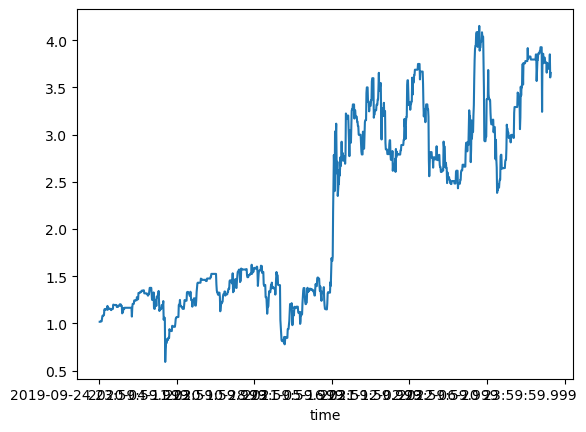

In [118]:
strategy_returns = (1 + signals_df['Strategy Returns']).cumprod().plot()